In [60]:
%matplotlib inline

from bs4 import BeautifulSoup
import urllib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tqdm import tqdm

In [17]:
HOWMANY = 2

In [85]:
def loadImage(url):
    raw = urllib.request.urlopen(url).read()
    npraw= np.array(bytearray(raw),dtype=np.uint8)
    return cv2.imdecode(npraw,-1)#-1 -> as is (with the alpha channel)

def getImageName(url):
    return url.split('/').pop().split('.').pop(0)

def loadImagesFromSite(url):
    imgs = []
    with urllib.request.urlopen(url) as response:
        html = BeautifulSoup(response.read(),"lxml")
        for link in tqdm(html.find_all('a')[:HOWMANY]):
            img = loadImage(link.get('href'))
            imgs += [img]
    return np.array(imgs)  

def saveDataset(X,Y):
    with open('pickledDataset','wb') as f:
        pickle.dump({"X":X,"Y":Y},f)
        
def loadDataset():
    try:
        with open('pickledDataset','rb') as f:
            d = pickle.load(f)
        return d["X"],d["Y"]
    except:
        return None,None
    
def display(X,Y,howmany=None):
    if howmany is None:
        howmany = X.shape[0]
        
    for i in range(howmany):
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(X[i])
        plt.subplot(1,2,2)
        plt.imshow(Y[i])
        

In [86]:
def get_patches(image,size,side):
    patches = []
    
    for i in range(int(size[0]/side)):
        for j in range(int(size[1]/side)):
            patches += [image[i*side:(i+1)*side,j*side:(j+1)*side]]
    return patches

def resize(image):
    size = (1000,1000)
    side = 100
    return cv2.resize(image,size),size,side

def preprocessorX(image):
    image,size,side = resize(image)
    
    image = image.astype(np.float32)
    image = (image - image.mean())/image.std()
    image[image<-3] = -3
    image[image>3] = 3
    image = (image - image.min())/(image.max() - image.min())
    return get_patches(image,size,side)
    

def preprocessorY(image):
    image,size,side = resize(image)    
    
    image = image.astype(np.float32)
    image = (image - image.min())/(image.max() - image.min())
    
    return get_patches(image,size,side)

def preprocess(images,preprocessor):
    result = []
    for image in images:
        result += preprocessor(image)
    return np.array(result)    

C:\Users\jurgad\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


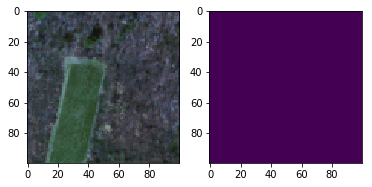

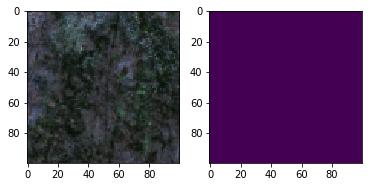

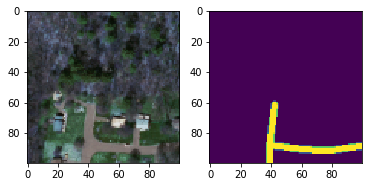

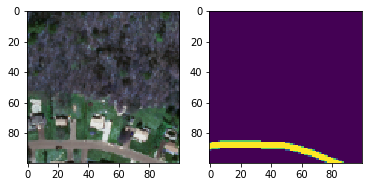

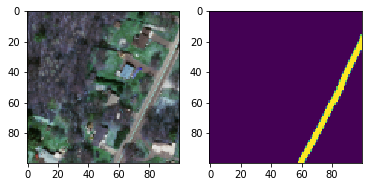

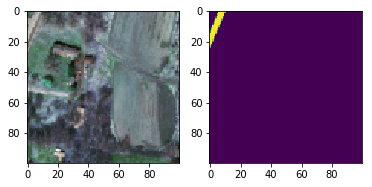

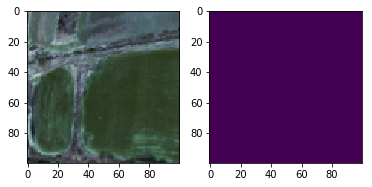

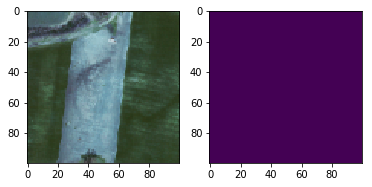

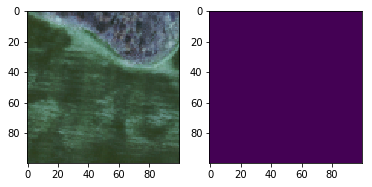

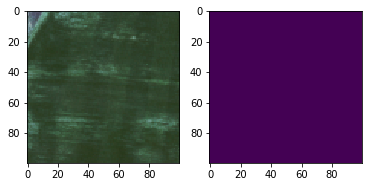

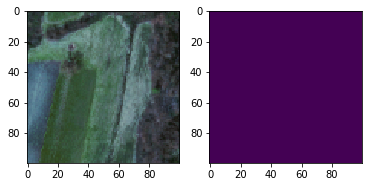

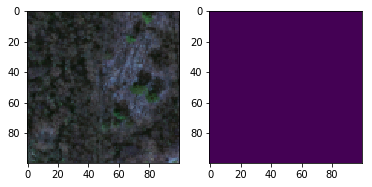

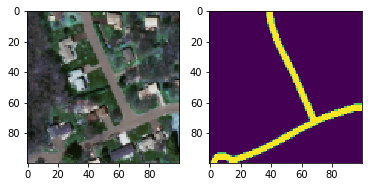

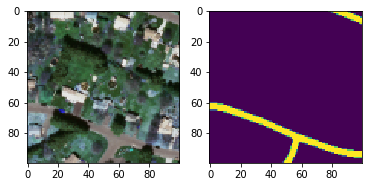

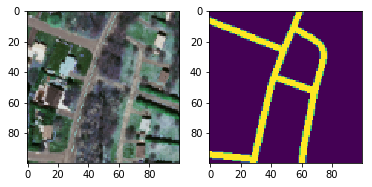

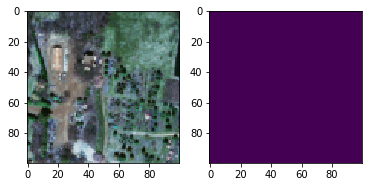

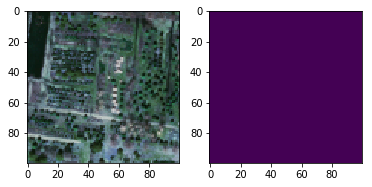

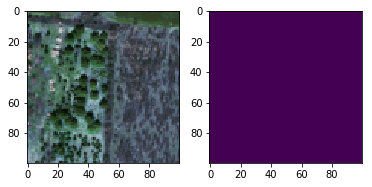

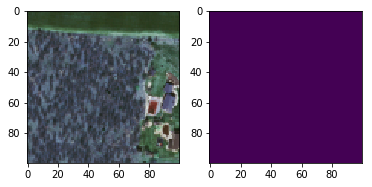

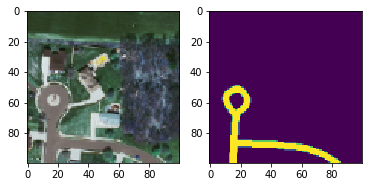

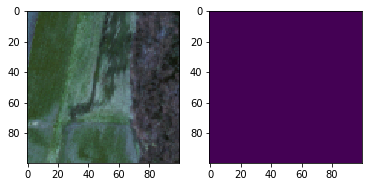

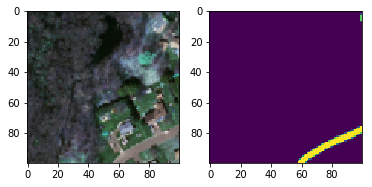

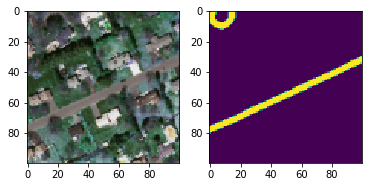

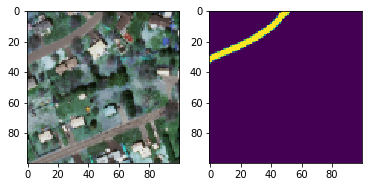

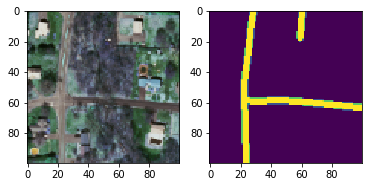

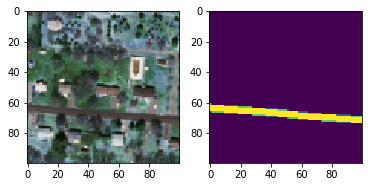

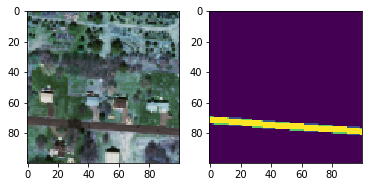

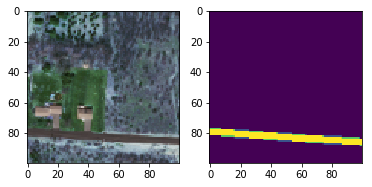

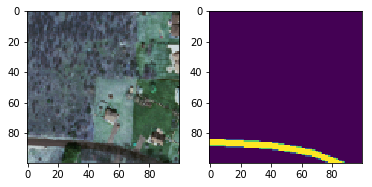

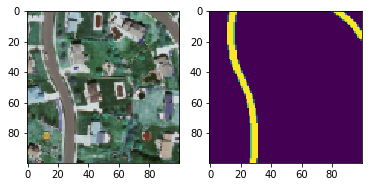

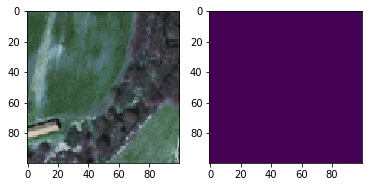

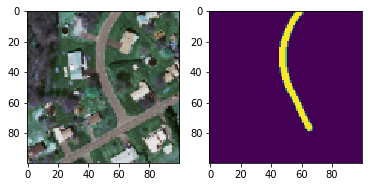

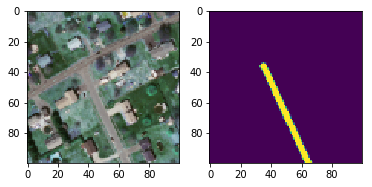

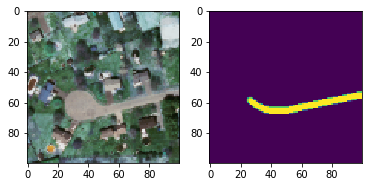

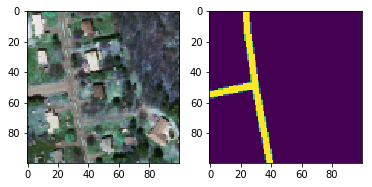

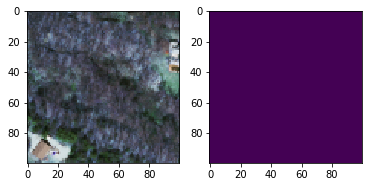

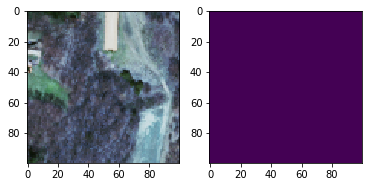

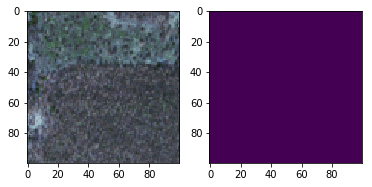

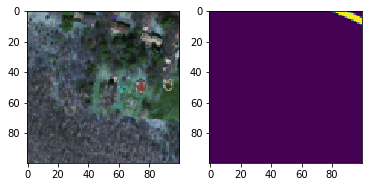

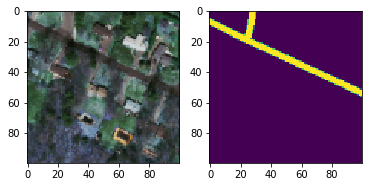

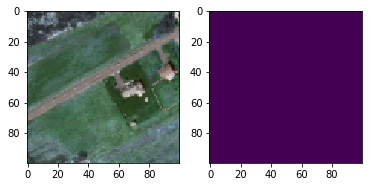

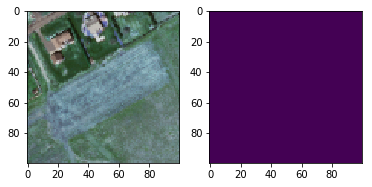

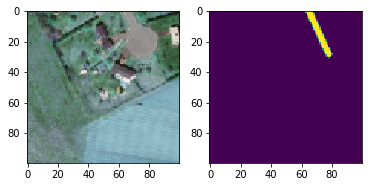

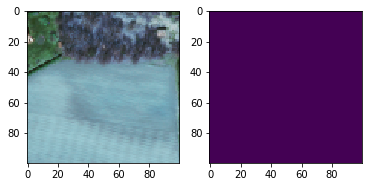

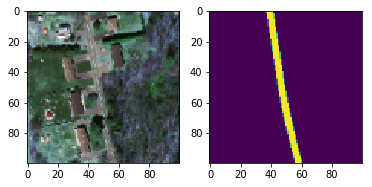

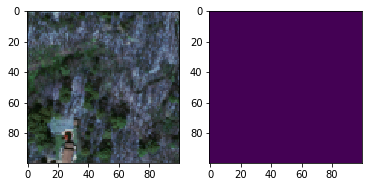

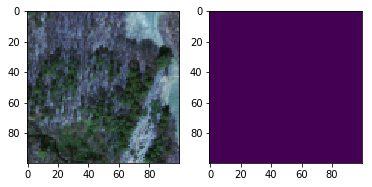

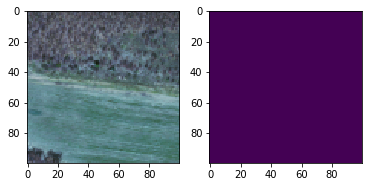

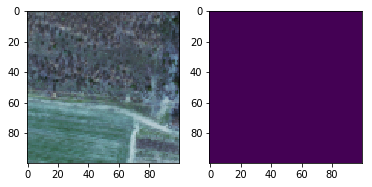

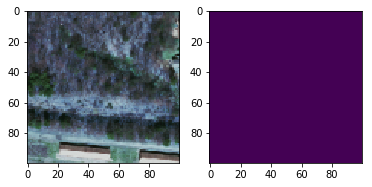

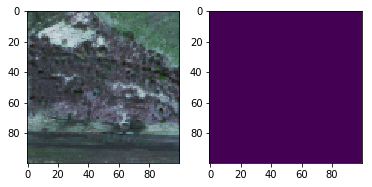

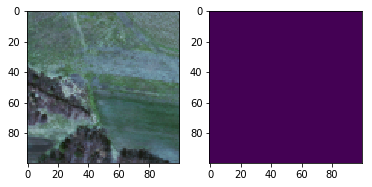

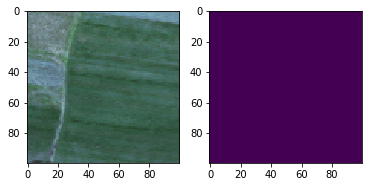

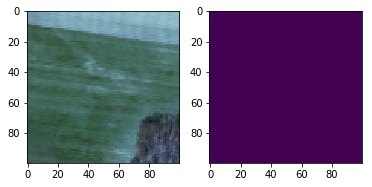

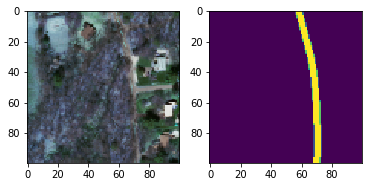

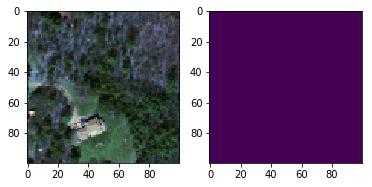

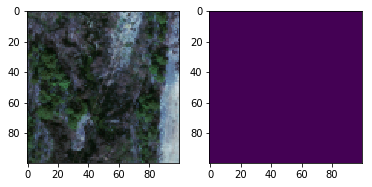

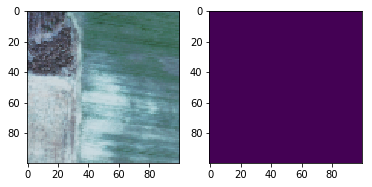

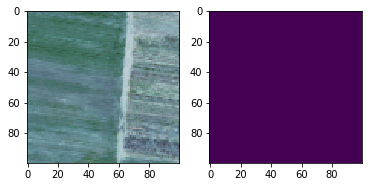

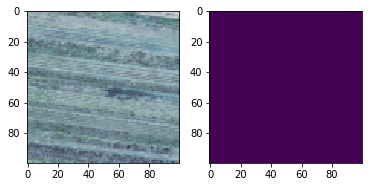

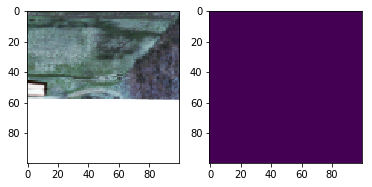

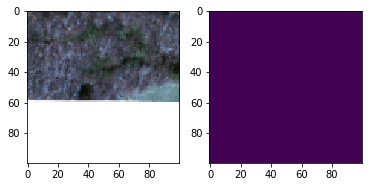

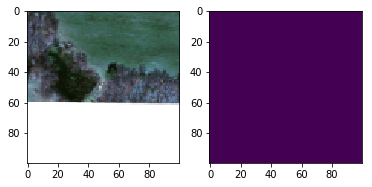

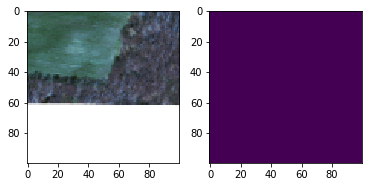

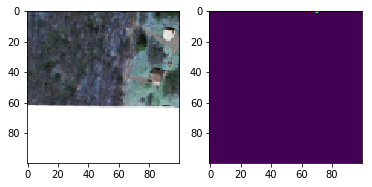

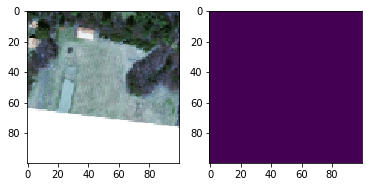

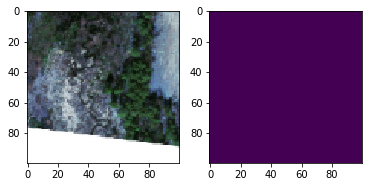

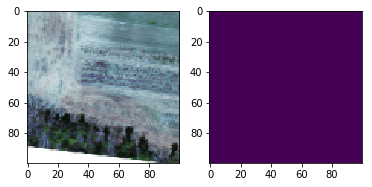

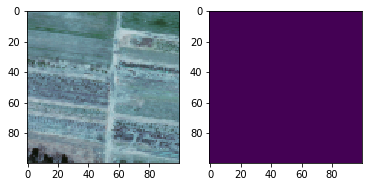

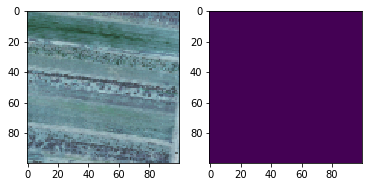

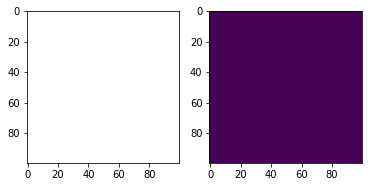

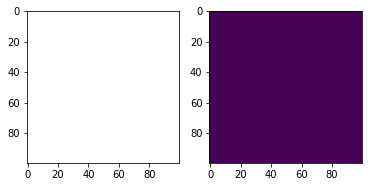

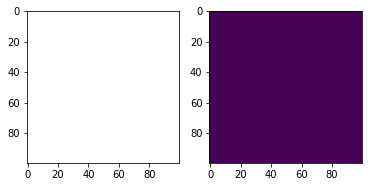

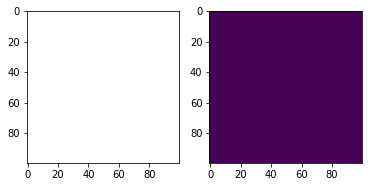

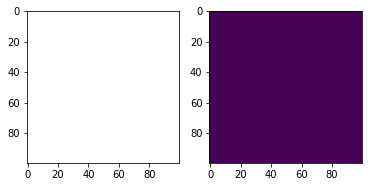

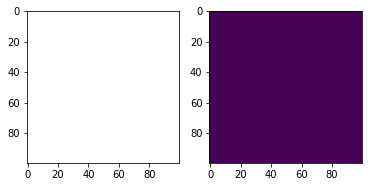

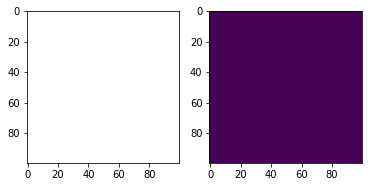

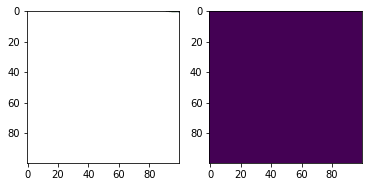

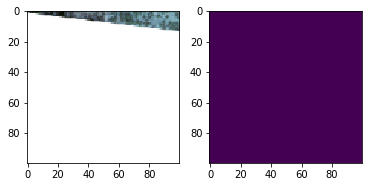

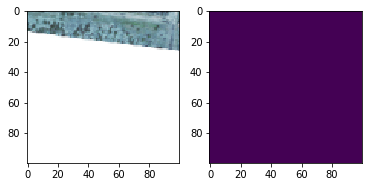

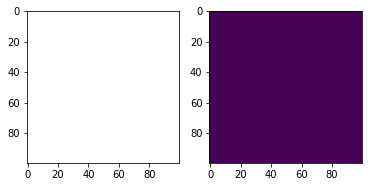

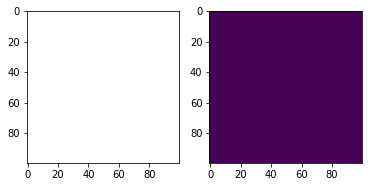

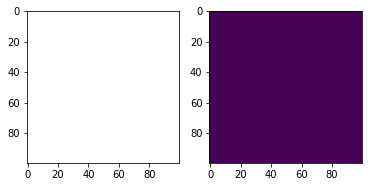

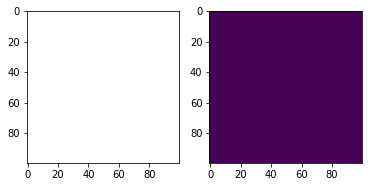

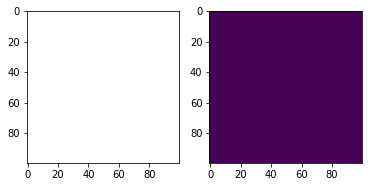

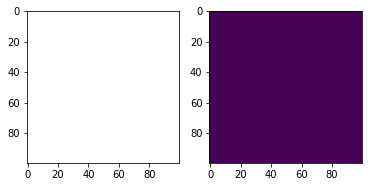

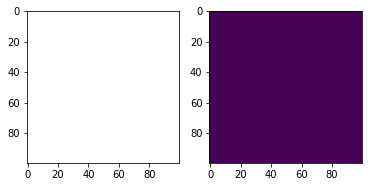

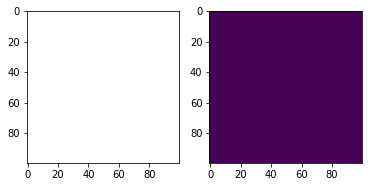

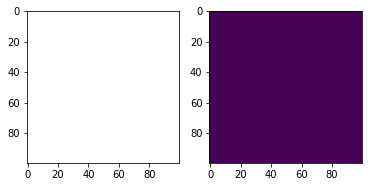

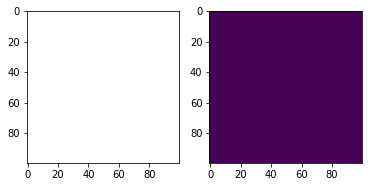

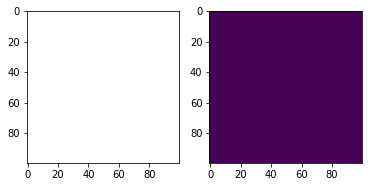

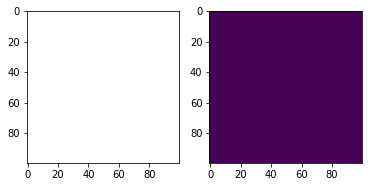

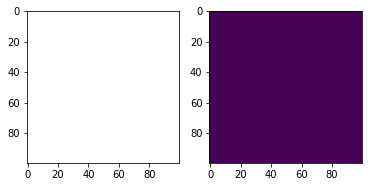

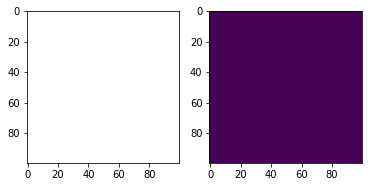

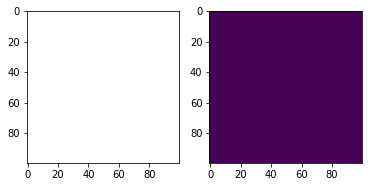

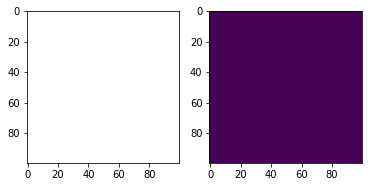

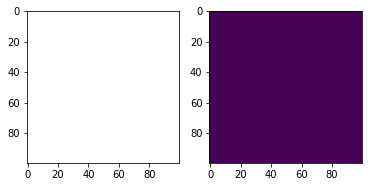

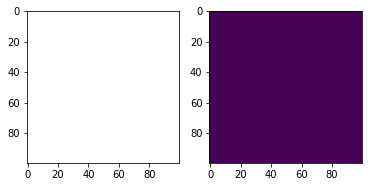

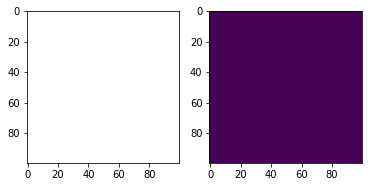

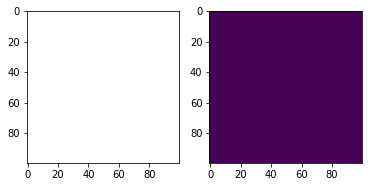

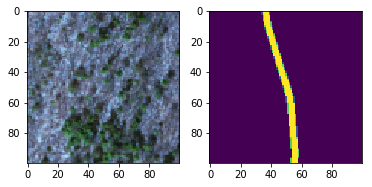

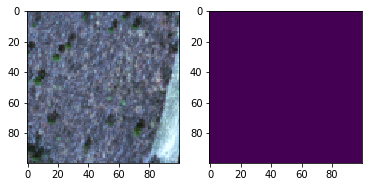

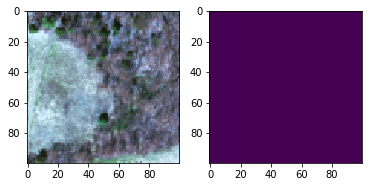

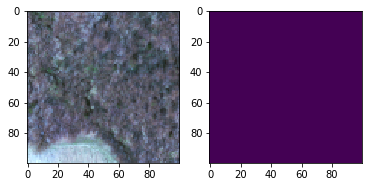

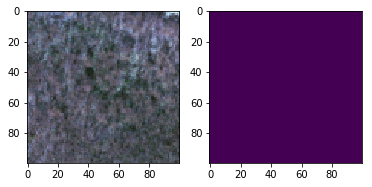

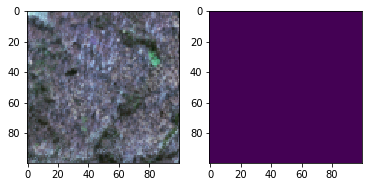

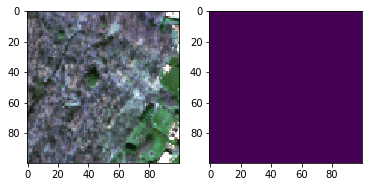

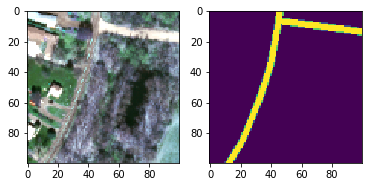

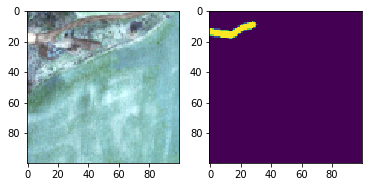

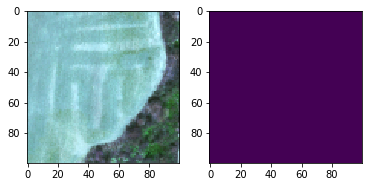

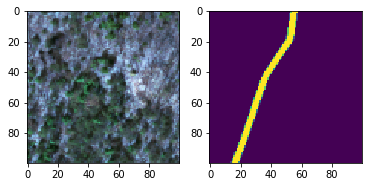

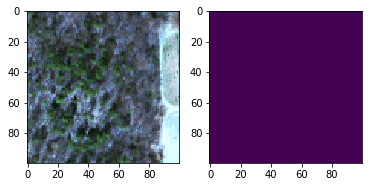

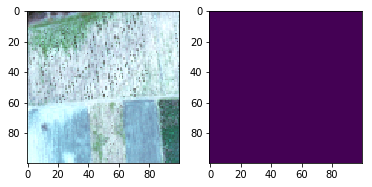

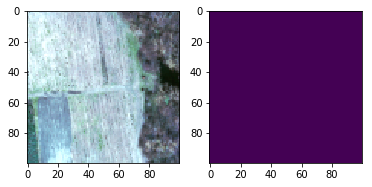

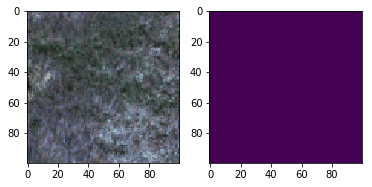

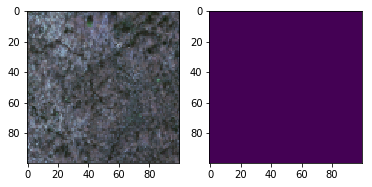

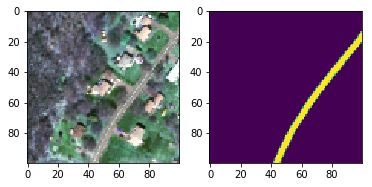

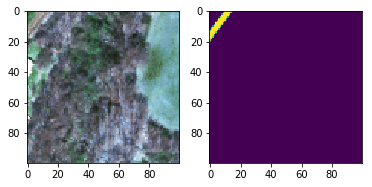

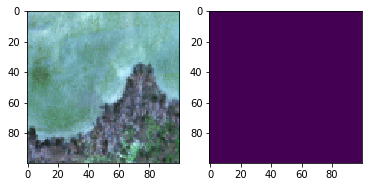

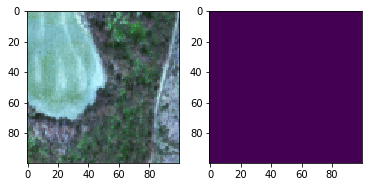

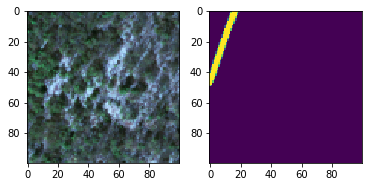

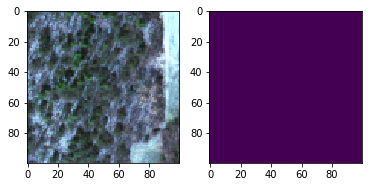

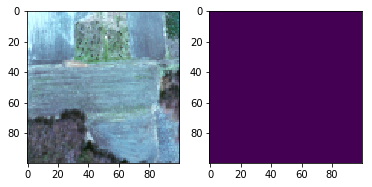

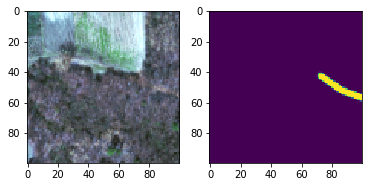

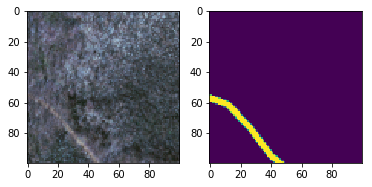

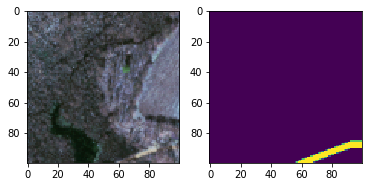

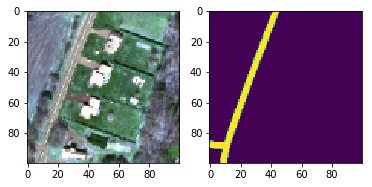

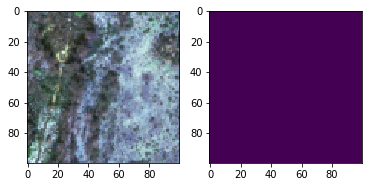

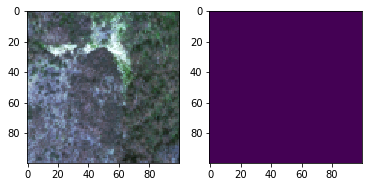

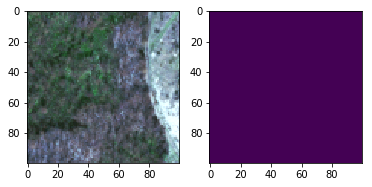

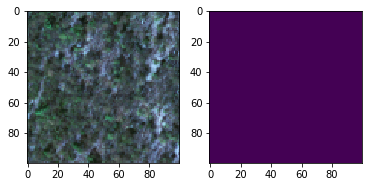

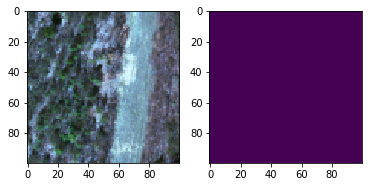

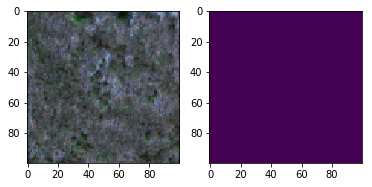

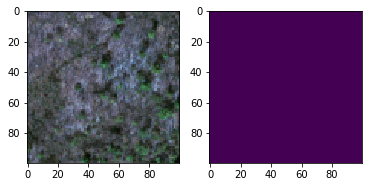

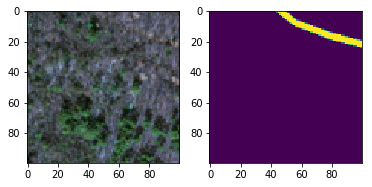

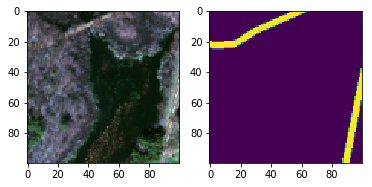

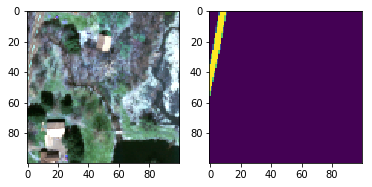

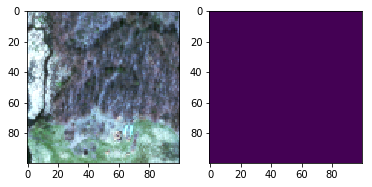

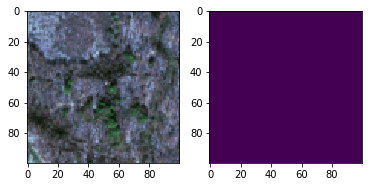

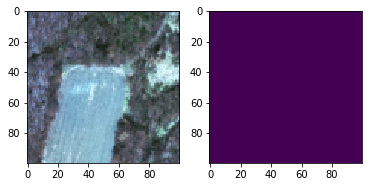

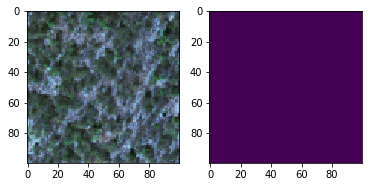

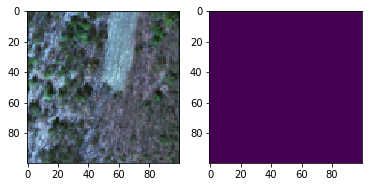

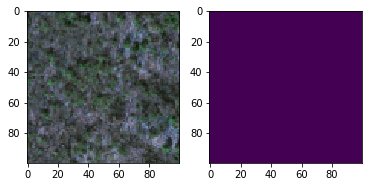

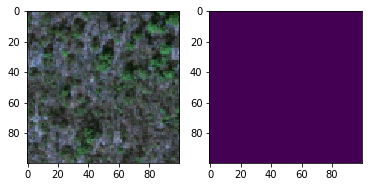

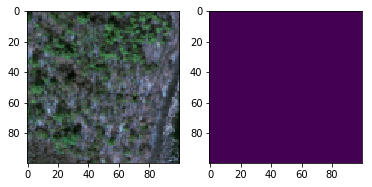

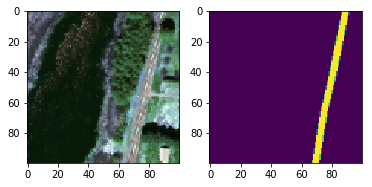

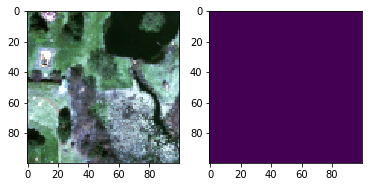

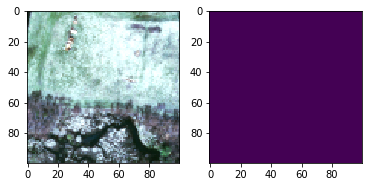

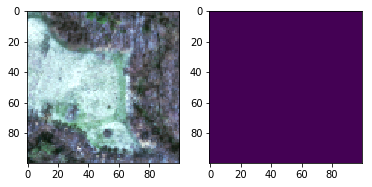

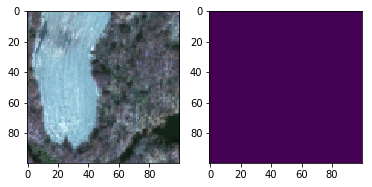

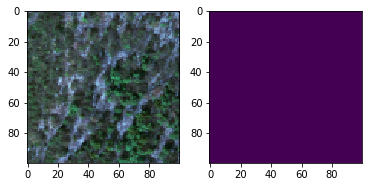

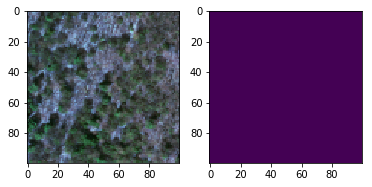

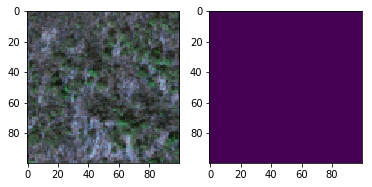

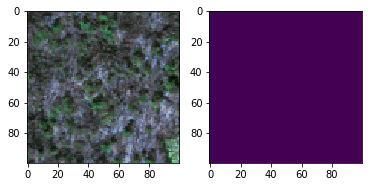

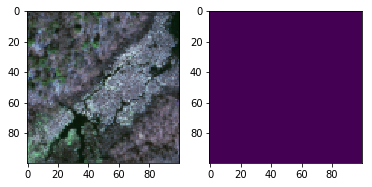

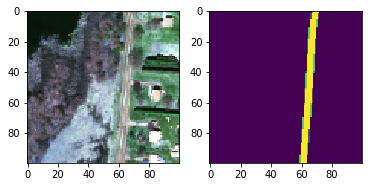

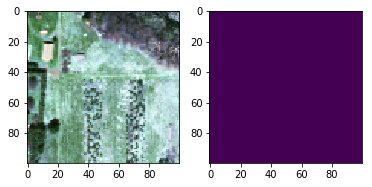

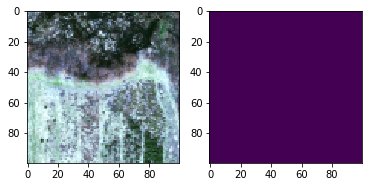

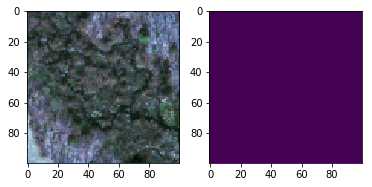

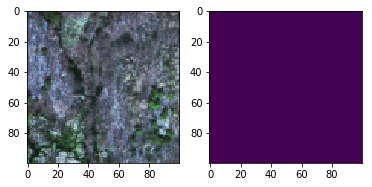

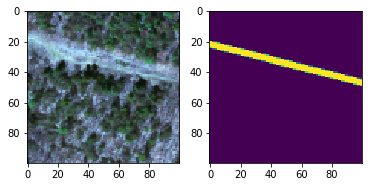

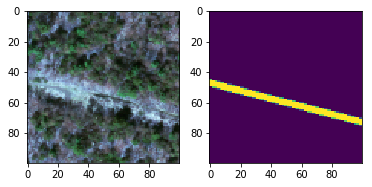

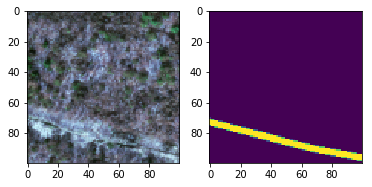

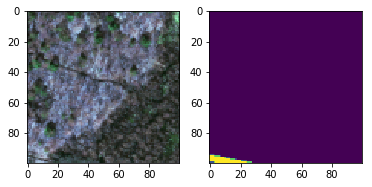

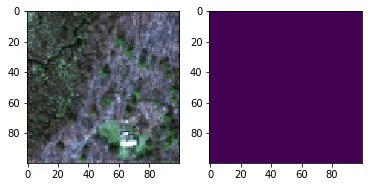

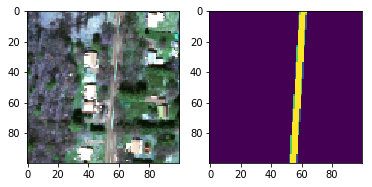

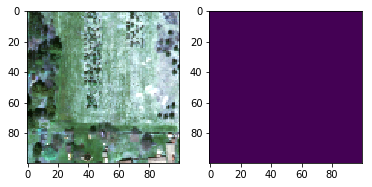

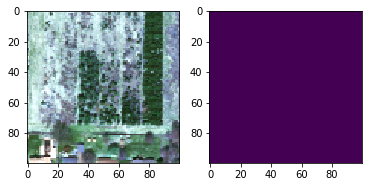

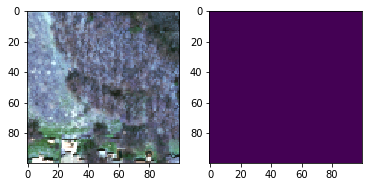

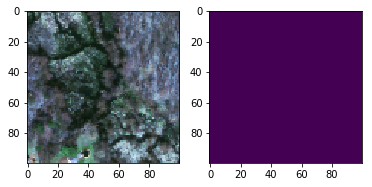

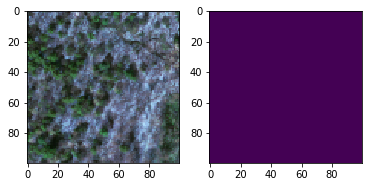

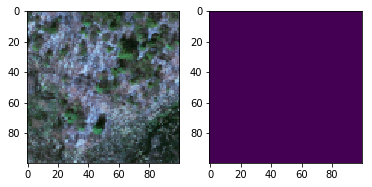

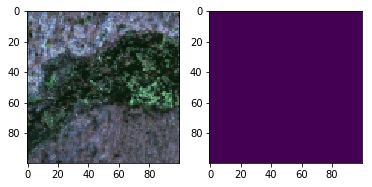

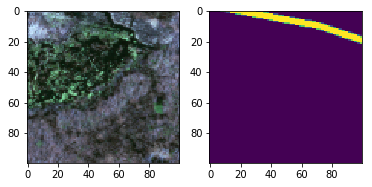

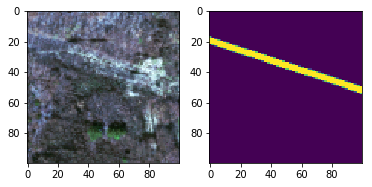

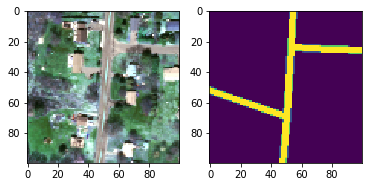

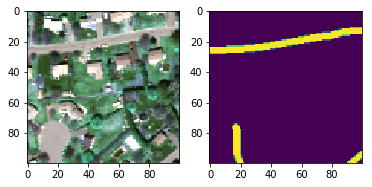

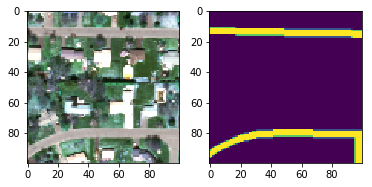

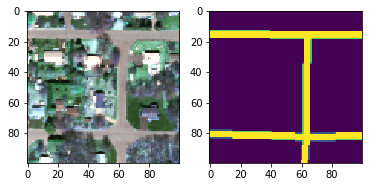

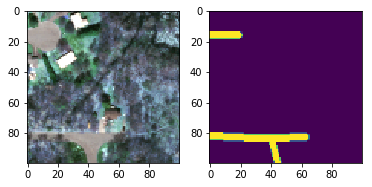

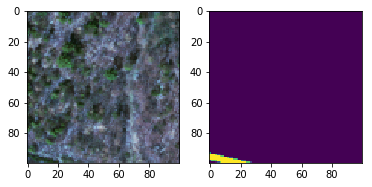

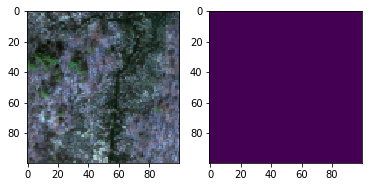

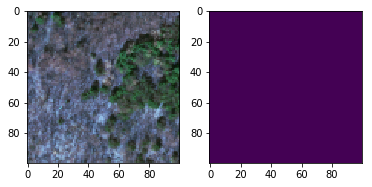

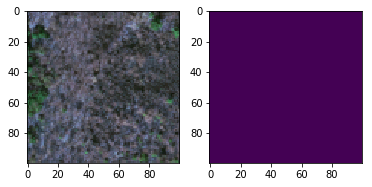

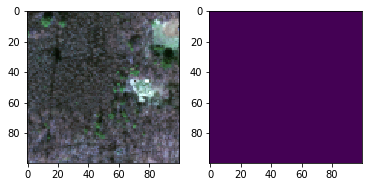

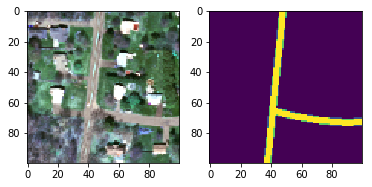

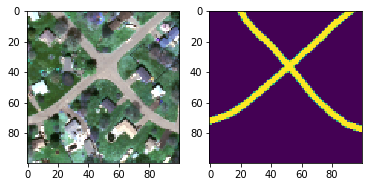

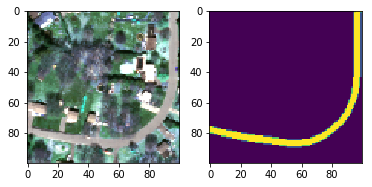

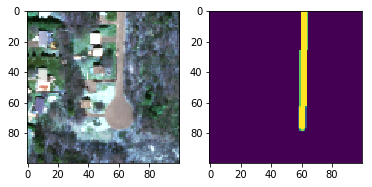

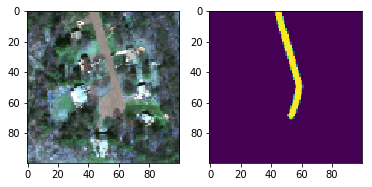

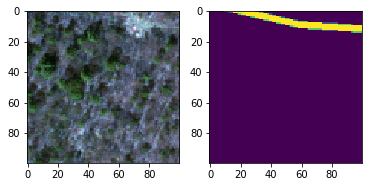

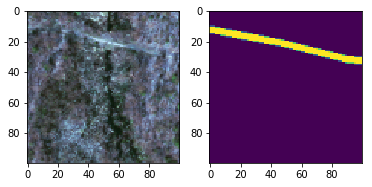

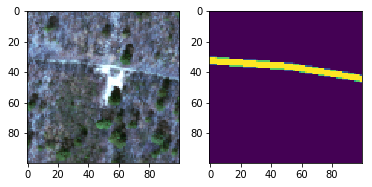

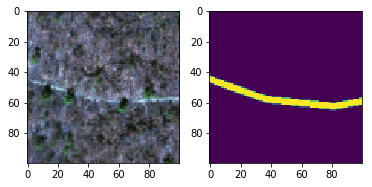

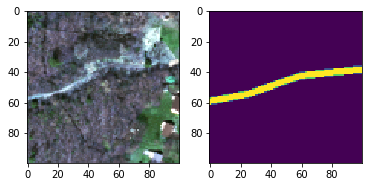

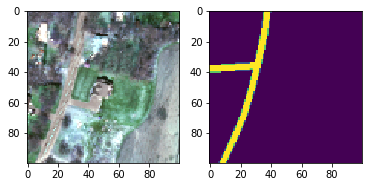

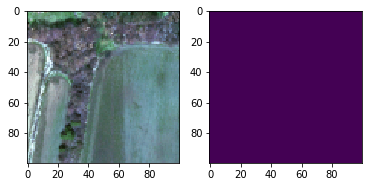

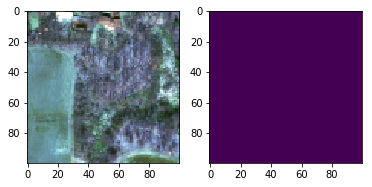

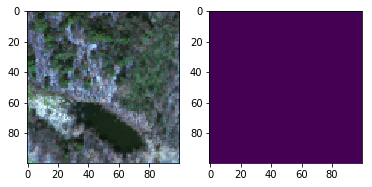

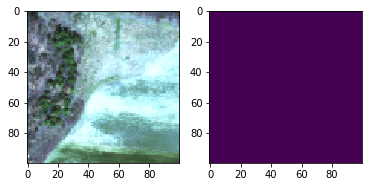

In [87]:
if __name__=="__main__":
    urlX = "https://www.cs.toronto.edu/~vmnih/data/mass_roads/train/sat/index.html"
    urlY = "https://www.cs.toronto.edu/~vmnih/data/mass_roads/train/map/index.html"
    
    X,Y = loadDataset()
    if X is None and Y is None:
        X = loadImagesFromSite(urlX)
        Y = loadImagesFromSite(urlY)
    
        X= preprocess(X,preprocessorX)
        Y= preprocess(Y,preprocessorY)
        
        saveDataset(X,Y)
        
    display(X,Y)